In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# local imports
# local imports
from lammps_implicit_der.tools import mpi_print, \
                                      get_default_data_path, \
                                      initialize_mpi, \
                                      error_tools, \
                                      TimingGroup, \
                                      plot_tools

from lammps_implicit_der.systems import BccVacancy, Bcc

In [2]:
comm = None
num_cells = 3

In [3]:
bcc = Bcc(datafile=None,
          snapcoeff_filename='W.snapcoeff',
          num_cells=num_cells, minimize=True,
          verbose=True, comm=comm, logname='vac.log')

bcc_vacancy_no_minim = BccVacancy(datafile=None,
                                     snapcoeff_filename='W.snapcoeff',
                                     num_cells=num_cells, minimize=False,
                                     verbose=True, comm=comm, logname='vac.log')

bcc_vacancy = BccVacancy(datafile=None,
                                     snapcoeff_filename='W.snapcoeff',
                                     num_cells=num_cells, minimize=True,
                                     verbose=True, comm=comm, logname='vac.log')

#bcc_vacancy_non_perturb.minimize_energy()


--------------------------------------------------------------------------------
Running LAMMPS with the following arguments:
-screen none -log vac.log

Setting SNAP potential

                  SNAP coefficients for: W
 Number of parameters (excluding beta0): 55
                                Element:  W  |  R =  0.5000 w =  1.0000

Minimizing energy with the following parameters:
ftol: 1e-08, maxiter: 1000, maxeval: 1000, algo: cg 

Number of atoms: 54, largest force value: 1.242e-14, force norm: 7.015e-14

--------------------------------------------------------------------------------
Running LAMMPS with the following arguments:
-screen none -log vac.log

Setting SNAP potential

                  SNAP coefficients for: W
 Number of parameters (excluding beta0): 55
                                Element:  W  |  R =  0.5000 w =  1.0000

Number of atoms: 53, largest force value: 3.665e-01, force norm: 1.925e+00

----------------------------------------------------------------------

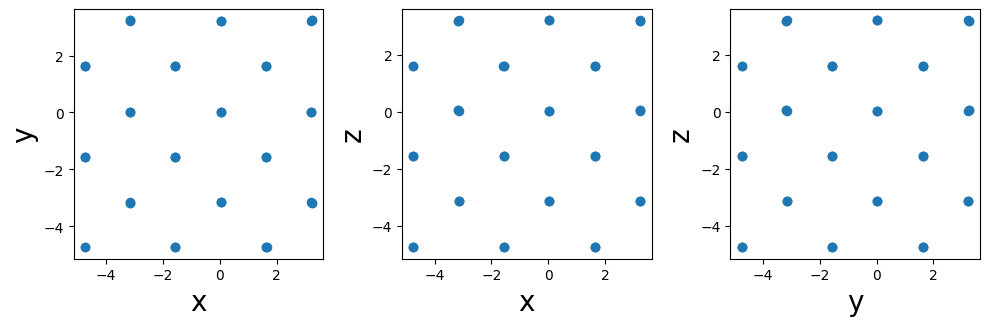

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
#plot_tools.plot_coords(axes, bcc.X_coord.reshape(-1, 3), color='gray', s=35)
plot_tools.plot_coords(axes, bcc_vacancy.X_coord.reshape(-1, 3), s=35)
plt.tight_layout()
plt.show()

In [5]:
bcc_vacancy_perturb = BccVacancy(datafile=None,
                                  snapcoeff_filename='W_perturbed.snapcoeff',
                                  num_cells=num_cells, minimize=True,
                                  verbose=True, comm=comm, logname='vac_perturb.log')


--------------------------------------------------------------------------------
Running LAMMPS with the following arguments:
-screen none -log vac_perturb.log

Setting SNAP potential

                  SNAP coefficients for: W
 Number of parameters (excluding beta0): 55
                                Element:  W  |  R =  0.5000 w =  1.0000

Minimizing energy with the following parameters:
ftol: 1e-08, maxiter: 1000, maxeval: 1000, algo: cg 

Number of atoms: 53, largest force value: 2.451e-09, force norm: 9.434e-09


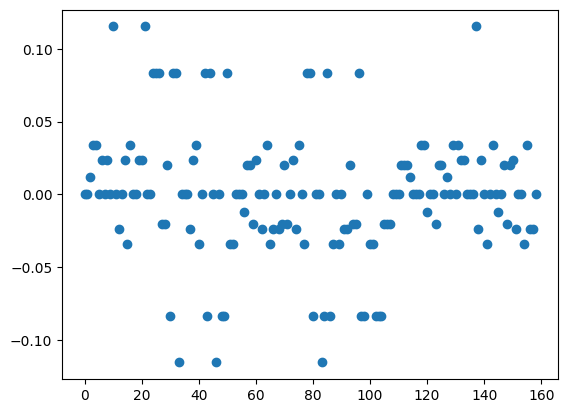

In [6]:
dX = bcc_vacancy.minimum_image(bcc_vacancy.X_coord - bcc_vacancy_perturb.X_coord)
plt.plot(dX, marker='o', ls='')

In [7]:
dX_dTheta_energy = bcc_vacancy.implicit_derivative(method='energy')

100%|██████████| 55/55 [03:02<00:00,  3.31s/it]


In [8]:
dX_dTheta_inverse = bcc_vacancy.implicit_derivative(method='inverse')

100%|██████████| 159/159 [00:04<00:00, 35.49it/s]


In [9]:
Theta0 = bcc_vacancy.pot.Theta_dict['W']['Theta'].copy()
Theta_perturb = bcc_vacancy_perturb.pot.Theta_dict['W']['Theta'].copy()
dTheta = Theta_perturb - Theta0

In [10]:
dX_true = bcc_vacancy.minimum_image(bcc_vacancy_perturb.X_coord - bcc_vacancy.X_coord)

In [11]:
dX_pred_energy = dTheta @ dX_dTheta_energy

In [12]:
dX_pred_inverse = dTheta @ dX_dTheta_inverse

Text(0, 0.5, 'Predicted dX')

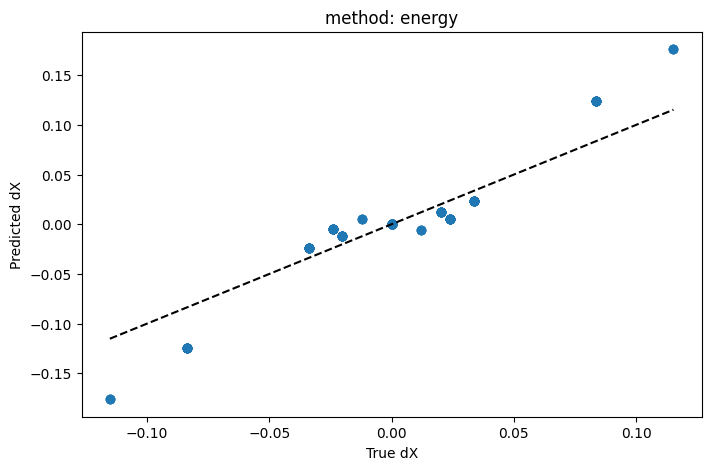

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(dX_true, dX_pred_energy, 'o')
ax.plot([dX_true.min(), dX_true.max()], [dX_true.min(), dX_true.max()], 'k--')
ax.set_title('method: energy')
ax.set_xlabel('True dX')
ax.set_ylabel('Predicted dX')

Text(0, 0.5, 'Predicted dX')

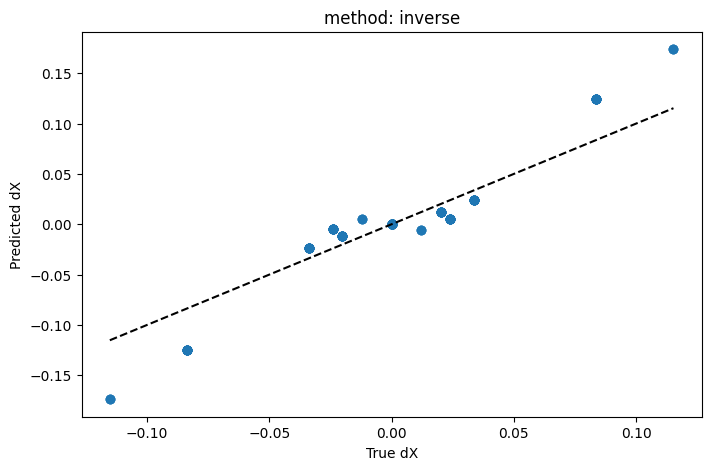

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(dX_true, dX_pred_inverse, 'o')
ax.plot([dX_true.min(), dX_true.max()], [dX_true.min(), dX_true.max()], 'k--')
ax.set_title('method: inverse')
ax.set_xlabel('True dX')
ax.set_ylabel('Predicted dX')

Text(0, 0.5, 'dX from energy')

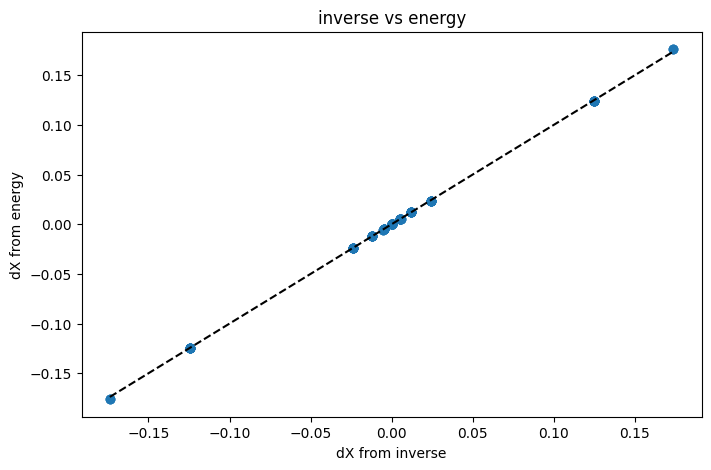

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax.plot(dX_pred_inverse, dX_pred_energy, 'o')
ax.plot([dX_pred_inverse.min(), dX_pred_inverse.max()], [dX_pred_inverse.min(), dX_pred_inverse.max()], 'k--')
ax.set_title('inverse vs energy')
ax.set_xlabel('dX from inverse')
ax.set_ylabel('dX from energy')